In [1]:
import numpy as np
import torch
import random
import pandas as pd
from transformers import AutoTokenizer, AutoModelForCausalLM
import matplotlib.pyplot as plt
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb:64'

import utils

%load_ext autoreload
%autoreload 2

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Global variable model:

model_name = 'microsoft/Phi-3-mini-4k-instruct' #"openai-community/gpt2-xl" #"meta-llama/Llama-2-7b-hf" #openai-community/gpt2-xl 'microsoft/Phi-3-mini-4k-instruct
dataset_path = 'datasets/hc_animal_phi3_inputs.csv' #'datasets/(non)animal_2000_gpt-4-turbo.csv'

# Load model and dataset
model = utils.LinearFeatureWrapper(model_name, dataset_path, 'Animal', 'Non-Animal', True)
model.set_layers(model.model.model.layers) # Depends on model! Typically model.model.model.layers. For gpt2: model.model.transformer.h

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
`flash-attention` package not found, consider installing for better performance: No module named 'flash_attn'.
Current `flash-attenton` does not support `window_size`. Either upgrade or use `attn_implementation='eager'`.
Loading checkpoint shards: 100%|██████████| 2/2 [00:04<00:00,  2.46s/it]
/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [3]:
# Global variables after loading model and data 
num_detector_samples = -1 # Number of samples to construct the detector

batch_size = 4 # Batch size for detector construction. 256 works well for Phi3 on ilikecats
max_tokens = None # If none, uses maximum length of the dataset

model.get_pos_neg_activations(num_detector_samples, max_tokens, batch_size)

You are not running the flash-attention implementation, expect numerical differences.


Processing batch 1/25
Processing batch 2/25
Processing batch 3/25
Processing batch 4/25
Processing batch 5/25
Processing batch 6/25
Processing batch 7/25
Processing batch 8/25
Processing batch 9/25
Processing batch 10/25
Processing batch 11/25
Processing batch 12/25
Processing batch 13/25
Processing batch 14/25
Processing batch 15/25
Processing batch 16/25
Processing batch 17/25
Processing batch 18/25
Processing batch 19/25
Processing batch 20/25
Processing batch 21/25
Processing batch 22/25
Processing batch 23/25
Processing batch 24/25
Processing batch 25/25
Processing batch 1/25
Processing batch 2/25
Processing batch 3/25
Processing batch 4/25
Processing batch 5/25
Processing batch 6/25
Processing batch 7/25
Processing batch 8/25
Processing batch 9/25
Processing batch 10/25
Processing batch 11/25
Processing batch 12/25
Processing batch 13/25
Processing batch 14/25
Processing batch 15/25
Processing batch 16/25
Processing batch 17/25
Processing batch 18/25
Processing batch 19/25
Proces

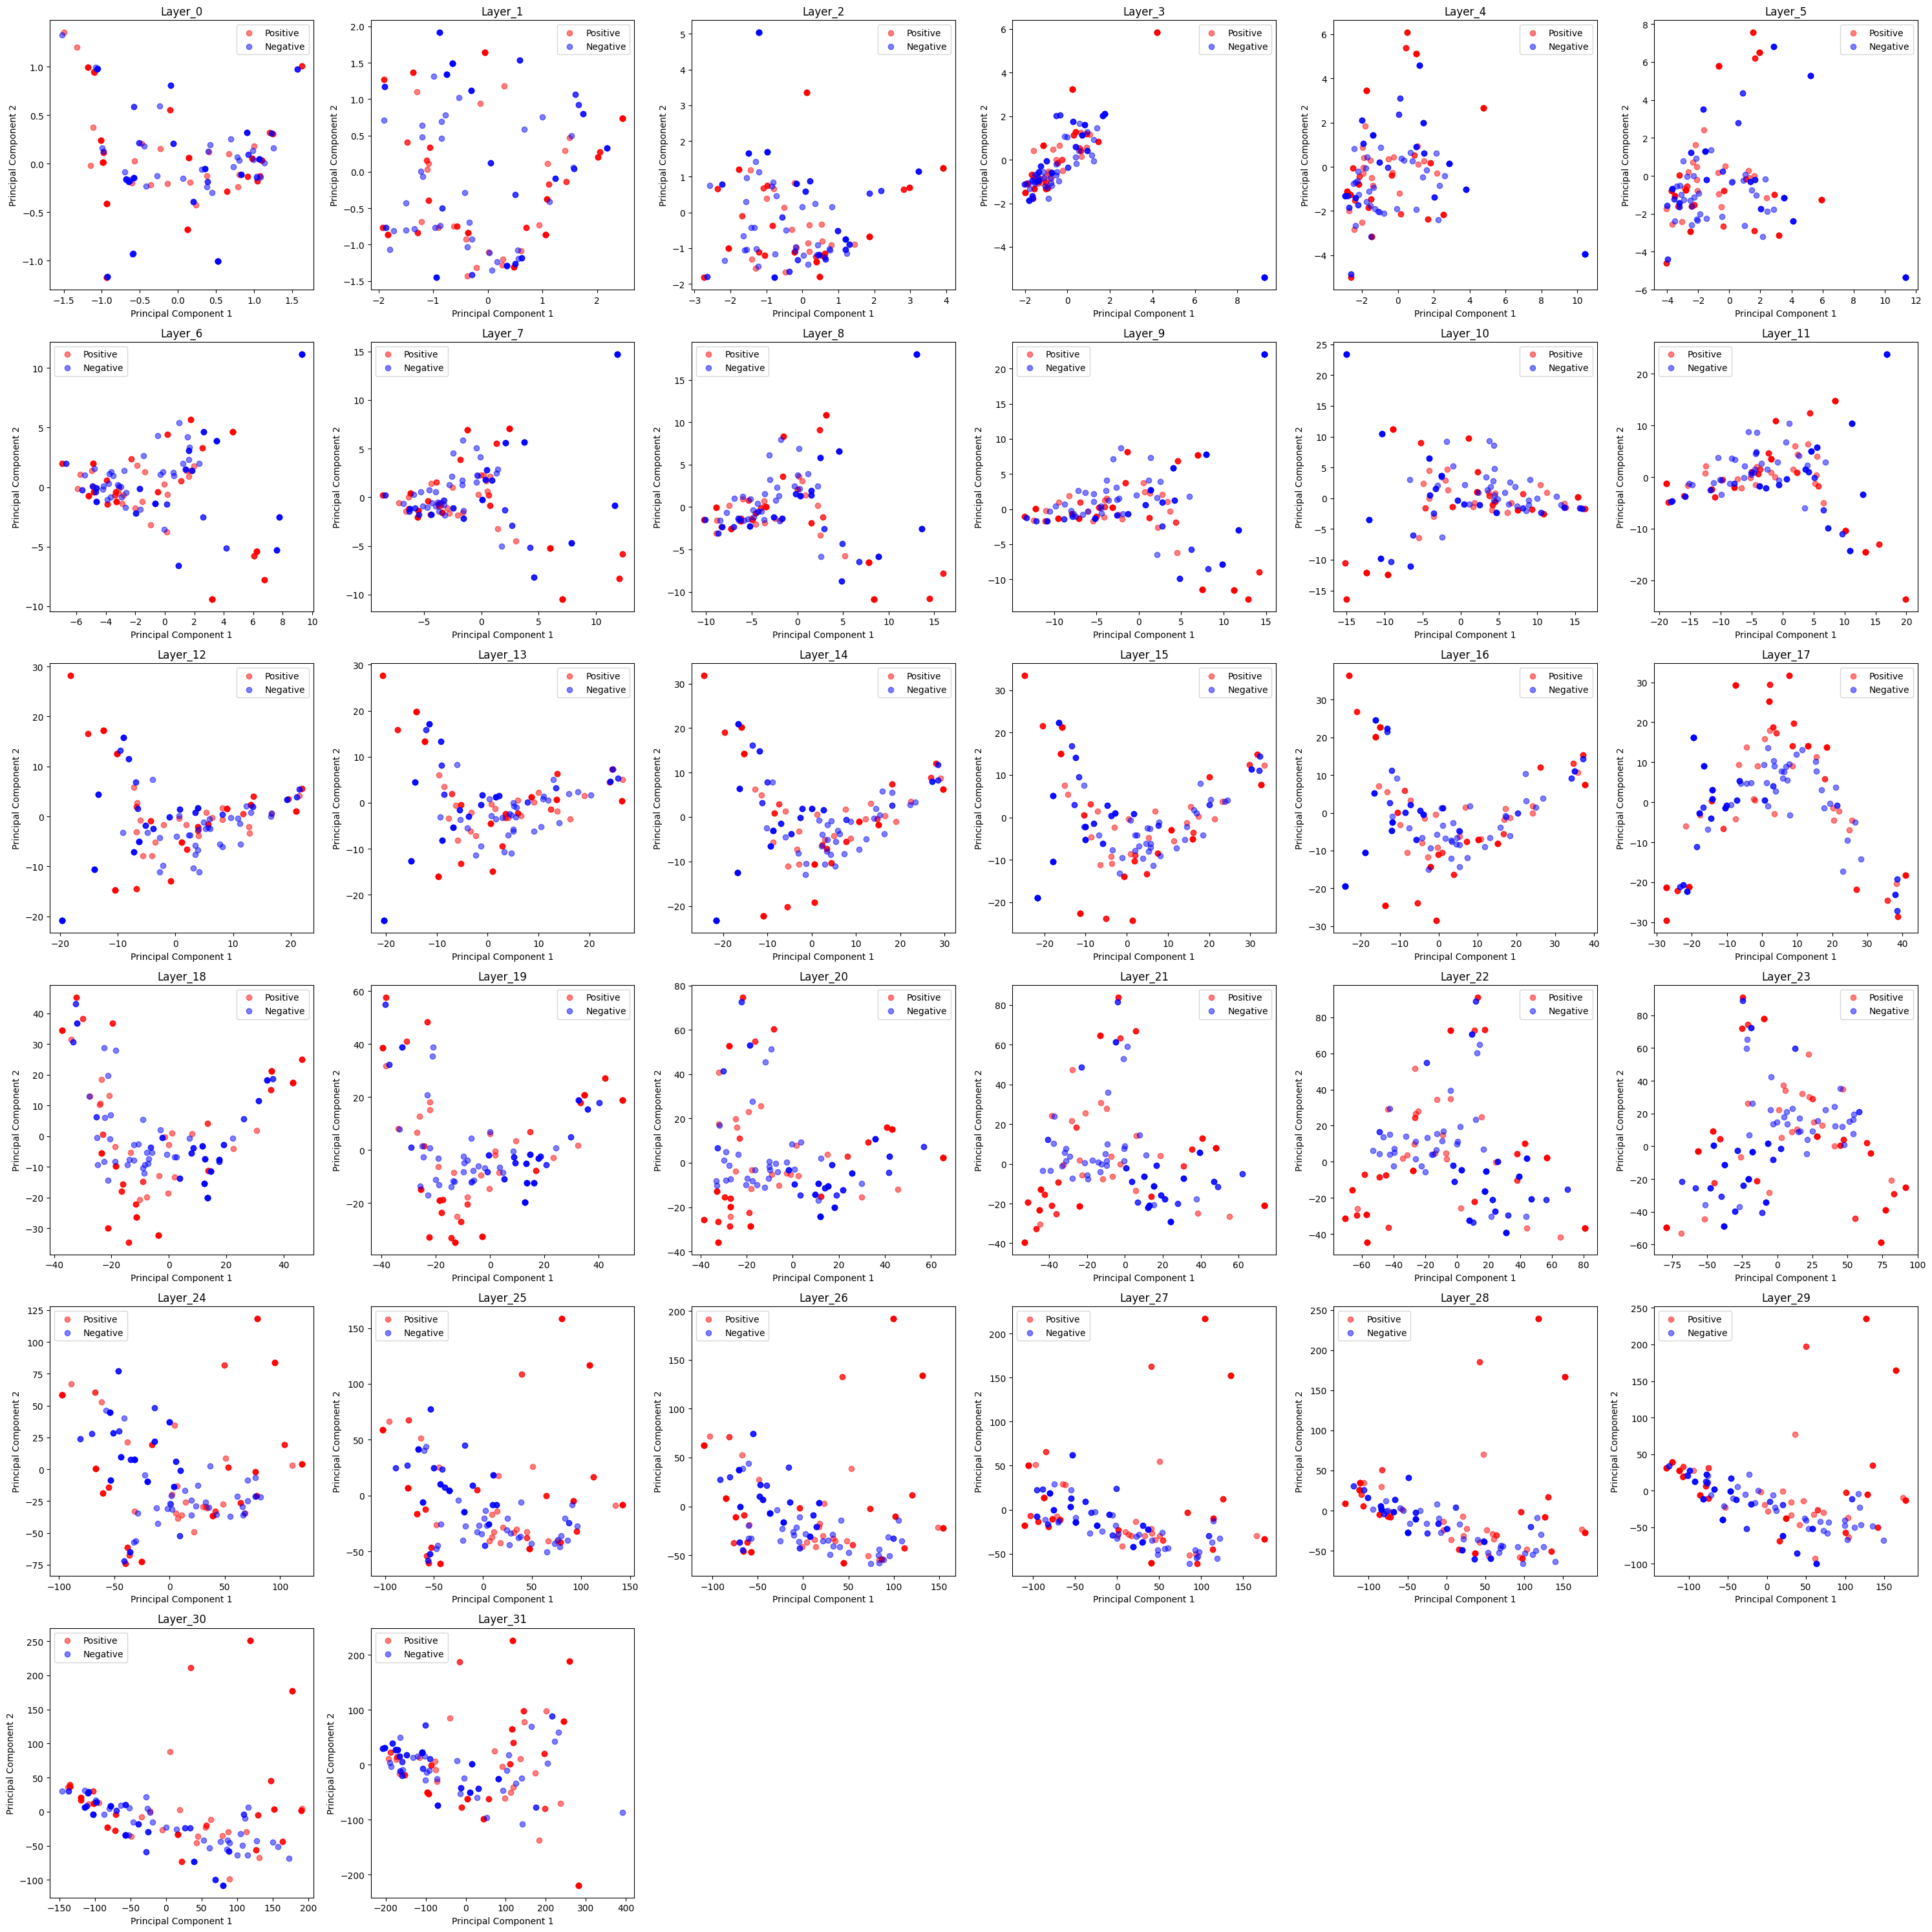

In [4]:
model.plot_pca()

In [5]:
model.calculate_detector_direction()

Processing batch 1/50
Processing batch 2/50
Processing batch 3/50
Processing batch 4/50
Processing batch 5/50
Processing batch 6/50
Processing batch 7/50
Processing batch 8/50
Processing batch 9/50
Processing batch 10/50
Processing batch 11/50
Processing batch 12/50
Processing batch 13/50
Processing batch 14/50
Processing batch 15/50
Processing batch 16/50
Processing batch 17/50
Processing batch 18/50
Processing batch 19/50
Processing batch 20/50
Processing batch 21/50
Processing batch 22/50
Processing batch 23/50
Processing batch 24/50
Processing batch 25/50
Processing batch 26/50
Processing batch 27/50
Processing batch 28/50
Processing batch 29/50
Processing batch 30/50
Processing batch 31/50
Processing batch 32/50
Processing batch 33/50
Processing batch 34/50
Processing batch 35/50
Processing batch 36/50
Processing batch 37/50
Processing batch 38/50
Processing batch 39/50
Processing batch 40/50
Processing batch 41/50
Processing batch 42/50
Processing batch 43/50
Processing batch 44/

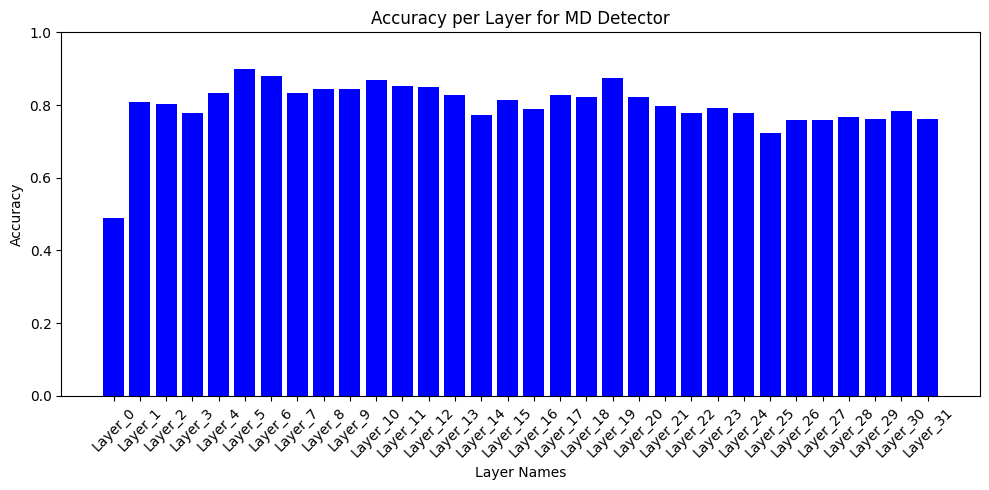

{'Layer_0': 0.4898989898989899,
 'Layer_1': 0.8080808080808081,
 'Layer_2': 0.803030303030303,
 'Layer_3': 0.7777777777777778,
 'Layer_4': 0.8333333333333334,
 'Layer_5': 0.898989898989899,
 'Layer_6': 0.8787878787878788,
 'Layer_7': 0.8333333333333334,
 'Layer_8': 0.8434343434343434,
 'Layer_9': 0.8434343434343434,
 'Layer_10': 0.8686868686868687,
 'Layer_11': 0.8535353535353535,
 'Layer_12': 0.8484848484848485,
 'Layer_13': 0.8282828282828283,
 'Layer_14': 0.7727272727272727,
 'Layer_15': 0.8131313131313131,
 'Layer_16': 0.7878787878787878,
 'Layer_17': 0.8282828282828283,
 'Layer_18': 0.8232323232323232,
 'Layer_19': 0.8737373737373737,
 'Layer_20': 0.8232323232323232,
 'Layer_21': 0.797979797979798,
 'Layer_22': 0.7777777777777778,
 'Layer_23': 0.7929292929292929,
 'Layer_24': 0.7777777777777778,
 'Layer_25': 0.7222222222222222,
 'Layer_26': 0.7575757575757576,
 'Layer_27': 0.7575757575757576,
 'Layer_28': 0.7676767676767676,
 'Layer_29': 0.7626262626262627,
 'Layer_30': 0.78282828

In [7]:
# Get dataset for testing direction detector
num_test_samples = -1 # Number of samples to test the detector
# batch_size = None # Batch size for detector construction. 256 works well for Phi3 on ilikecats
# max_tokens = None # If none, uses maximum length of the dataset

test_dataset = dataset = utils.Dataset()
test_dataset.load_data(dataset_path, 'Animal', 'Non-Animal')
test_data, labels = test_dataset.combine_dataset_get_labels(num_test_samples)

model.evaluate_MD_detector(test_data, labels, max_tokens, batch_size)

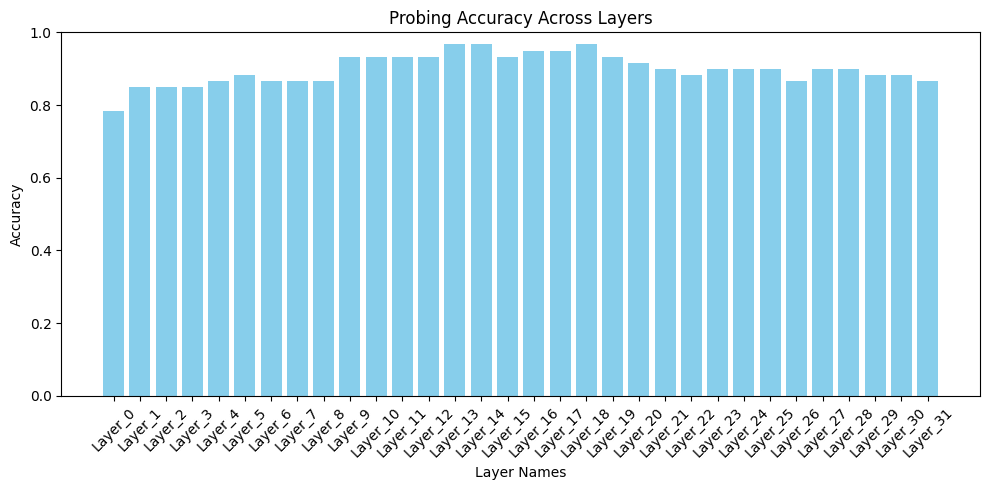

{'Layer_0': 0.7833333333333333,
 'Layer_1': 0.85,
 'Layer_2': 0.85,
 'Layer_3': 0.85,
 'Layer_4': 0.8666666666666667,
 'Layer_5': 0.8833333333333333,
 'Layer_6': 0.8666666666666667,
 'Layer_7': 0.8666666666666667,
 'Layer_8': 0.8666666666666667,
 'Layer_9': 0.9333333333333333,
 'Layer_10': 0.9333333333333333,
 'Layer_11': 0.9333333333333333,
 'Layer_12': 0.9333333333333333,
 'Layer_13': 0.9666666666666667,
 'Layer_14': 0.9666666666666667,
 'Layer_15': 0.9333333333333333,
 'Layer_16': 0.95,
 'Layer_17': 0.95,
 'Layer_18': 0.9666666666666667,
 'Layer_19': 0.9333333333333333,
 'Layer_20': 0.9166666666666666,
 'Layer_21': 0.9,
 'Layer_22': 0.8833333333333333,
 'Layer_23': 0.9,
 'Layer_24': 0.9,
 'Layer_25': 0.9,
 'Layer_26': 0.8666666666666667,
 'Layer_27': 0.9,
 'Layer_28': 0.9,
 'Layer_29': 0.8833333333333333,
 'Layer_30': 0.8833333333333333,
 'Layer_31': 0.8666666666666667}

In [8]:
model.train_and_evaluate_probes()